Topic 6: Around Simpson's Paradox

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import logit

In [19]:
# Load the dataset
file_path = 'https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false'
data = pd.read_csv(file_path)

In [20]:
# Data preparation
data['Smoker'] = data['Smoker'].astype('category')
data['Status'] = data['Status'].astype('category')
data['Death'] = data['Status'].map({'Alive': 0, 'Dead': 1})
data['Smoker_Code'] = data['Smoker'].map({'Yes': 1, 'No': 0})

In [21]:
# Define age categories
bins = [18, 34, 54, 64, 100]
labels = ['18-34', '34-54', '54-64', '65+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [22]:
# Analysis by Smoking Habit
smoking_status_counts = data.groupby(['Smoker', 'Status']).size().unstack()
mortality_rate = smoking_status_counts.apply(lambda x: x['Dead'] / x.sum(), axis=1)

In [23]:
# Analysis by Age Group
age_smoking_status_counts = data.groupby(['Age Group', 'Smoker', 'Status']).size().unstack()
age_group_mortality_rate = age_smoking_status_counts.apply(lambda x: x['Dead'] / x.sum(), axis=1)

In [24]:
# Logistic Regression
model = logit("Death ~ Age + Smoker_Code", data).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.381244
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Death   No. Observations:                 1314
Model:                          Logit   Df Residuals:                     1311
Method:                           MLE   Df Model:                            2
Date:                Sun, 12 Nov 2023   Pseudo R-squ.:                  0.3579
Time:                        20:44:03   Log-Likelihood:                -500.95
converged:                       True   LL-Null:                       -780.16
                                        LLR p-value:                5.534e-122
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.3519      0.360    -17.637      0.000      -7.058      -5.646
Age             0.0998    

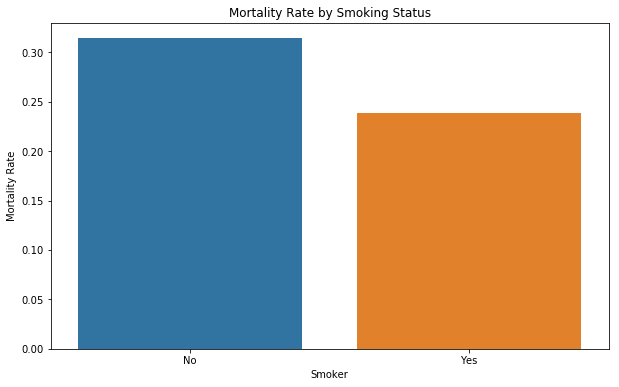

In [25]:
# Visualization
# Mortality Rate by Smoking Status
plt.figure(figsize=(10, 6))
sns.barplot(x=smoking_status_counts.index, y=mortality_rate)
plt.title('Mortality Rate by Smoking Status')
plt.ylabel('Mortality Rate')
plt.xlabel('Smoker')
plt.show()

<Figure size 720x432 with 0 Axes>

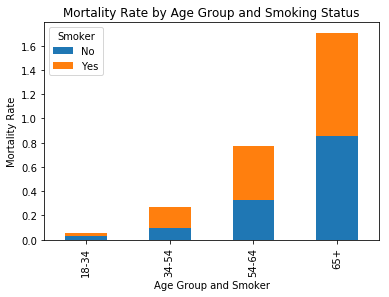

In [26]:
# Mortality Rate by Age Group and Smoking Status
plt.figure(figsize=(10, 6))
age_group_mortality_rate.unstack().plot(kind='bar', stacked=True)
plt.title('Mortality Rate by Age Group and Smoking Status')
plt.ylabel('Mortality Rate')
plt.xlabel('Age Group and Smoker')
plt.show()

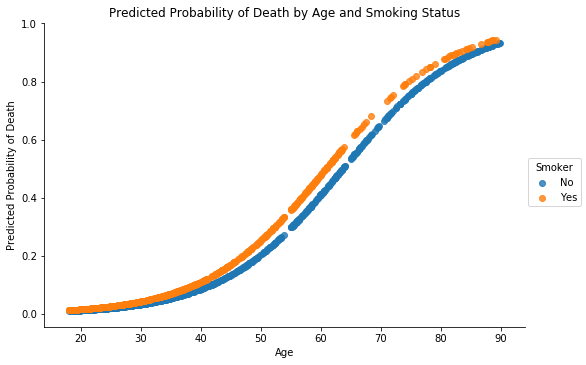

In [32]:
# Predicted Probabilities from Logistic Regression
data['Predicted_Death_Prob'] = model.predict(data[['Age', 'Smoker_Code']])
sns.lmplot(x='Age', y='Predicted_Death_Prob', hue='Smoker', data=data, logistic=True, aspect=1.5)
plt.title('Predicted Probability of Death by Age and Smoking Status')
plt.ylabel('Predicted Probability of Death')
plt.xlabel('Age')
plt.show()